In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
# Завантажуємо Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Переводимо x_train та x_test в правильну форму (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)  # (кількість_зображень, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Масштабуємо зображення до [0, 1]
# Нормалізуємо значення пікселів
x_train = x_train / 255.0
x_test = x_test / 255.0


In [3]:
model = Sequential([
    # Згорткові шари
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Перетворюємо 2D дані в 1D (Flatten)
    Flatten(),
    
    # Додаємо ще один Dense шар
    Dense(128, activation='relu'),  
    Dropout(0.5),  
    
    # Вихідний шар для 10 класів
    Dense(10, activation='softmax')
])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [133]:
# Компілюємо модель
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/15
469/469 [==============================] - 68s 143ms/step - loss: 0.5318 - accuracy: 0.8114 - val_loss: 0.3358 - val_accuracy: 0.8734
Epoch 2/15
469/469 [==============================] - 67s 143ms/step - loss: 0.3421 - accuracy: 0.8794 - val_loss: 0.2888 - val_accuracy: 0.8961
Epoch 3/15
469/469 [==============================] - 67s 144ms/step - loss: 0.2898 - accuracy: 0.8950 - val_loss: 0.2745 - val_accuracy: 0.9021
Epoch 4/15
469/469 [==============================] - 68s 145ms/step - loss: 0.2615 - accuracy: 0.9053 - val_loss: 0.2472 - val_accuracy: 0.9102
Epoch 5/15
469/469 [==============================] - 67s 144ms/step - loss: 0.2332 - accuracy: 0.9149 - val_loss: 0.2298 - val_accuracy: 0.9169
Epoch 6/15
469/469 [==============================] - 68s 145ms/step - loss: 0.2145 - accuracy: 0.9209 - val_loss: 0.2245 - val_accuracy: 0.9176
Epoch 7/15
469/469 [==============================] - 68s 145ms/step - loss: 0.1987 - accuracy: 0.9275 - val_loss: 0.2300 - val_ac

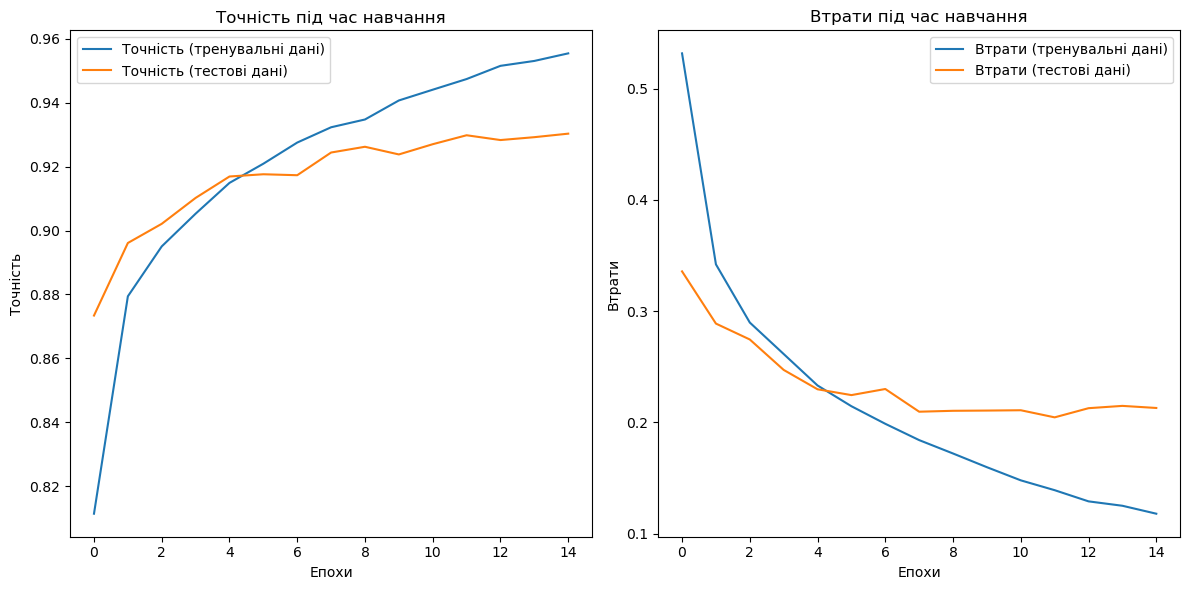

In [134]:
# Візуалізація графіків точності
plt.figure(figsize=(12, 6))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність (тренувальні дані)')
plt.plot(history.history['val_accuracy'], label='Точність (тестові дані)')
plt.title('Точність під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати (тренувальні дані)')
plt.plot(history.history['val_loss'], label='Втрати (тестові дані)')
plt.title('Втрати під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

# Показуємо графіки
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 34ms/step


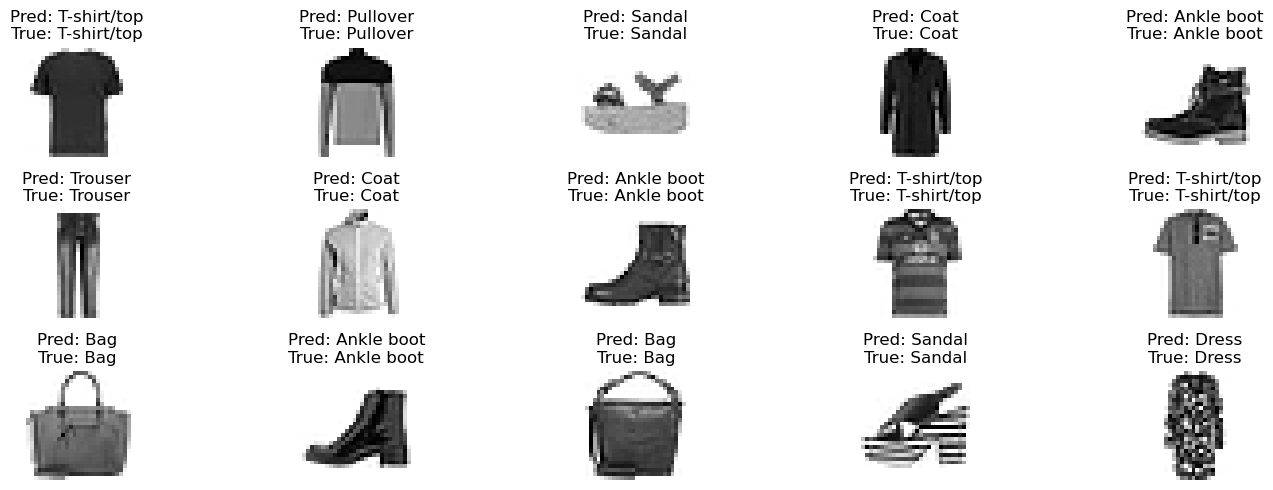

Кількість коректно розпізнаних зображень: 15/15
Процент правильних прогнозів: 100.00%


In [138]:
# Випадкові індекси для тестових зображень
n_test = 15
random_indices = np.random.choice(len(x_test), n_test, replace=False)

# Передбачення для вибраних зображень
predictions = model.predict(x_test[random_indices])

# Назви класів для Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Змінна для підрахунку правильних прогнозів
correct_predictions = 0

# Виведення кожного зображення окремо
n_lines = n_test // 5 + (1 if n_test % 5 != 0 else 0);
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    true_label = y_test[idx]  # Правильна відповідь
    predicted_label = np.argmax(predictions[i])  # Прогноз моделі

    # Якщо прогноз правильний, збільшуємо лічильник правильних прогнозів
    if true_label == predicted_label:
        correct_predictions += 1

    # Виведення зображення з прогнозом та реальним класом
    plt.subplot(n_lines, 5, i + 1)
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.title(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Обчислюємо відсоток правильних прогнозів
accuracy = (correct_predictions / n_test) * 100
print(f"Кількість коректно розпізнаних зображень: {correct_predictions}/{n_test}")
print(f"Процент правильних прогнозів: {accuracy:.2f}%")